# Exercise 1

In [1]:
from Automata import Automata
from utils import visualize
import math

%load_ext autoreload
%autoreload 2

## Task 1 - Setting up the modeling environment (DONE)

Scenario to show that our implementation allows for different pedestrians and obstacles editing an easy JSON file (using as input for the automata the file path) or writing in a notebook a dictionary as follow: 

In [ ]:
configTask1 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 5,
        "height": 5
    },
    "pedestrians": [
        [1, 0, 2]
    ],
    "targets": [
        [[1], 4, 2]
    ],
    "obstacles": [
        [2, 2], [2, 1], [2, 3]
    ]
}



In [ ]:
task1Automata = Automata(configTask1)

Let's take a look at the initial state:

In [ ]:
visualize(task1Automata.getState())

Let's simulate for 10 time steps and let's take a look at the final state with the followed path:

In [ ]:
task1Automata.simulate(task1Automata.basicOperator, 10)

In [ ]:
visualize(task1Automata.getStateWithPaths())

## Task 2 - First step of a single pedestrian (DONE)

Scenario:
- 50 by 50 cells (2500 in total)
- Single pedestrian at position (5, 25)
- Target at (25, 25)

In [ ]:
configTask2 = {
    "name": "Task2Scenario",
    "dimensions": {
        "width": 49,
        "height": 49
    },
    "pedestrians": [
        [1, 4, 24]
    ],
    "targets": [
        [[1], 24, 24]
    ],
    "obstacles": []
}

In [ ]:
task2Automata = Automata(configTask2)

Let's take a look at the initial state:

In [ ]:
visualize(task2Automata.getState())

Let's simulate for 25 time steps and let's take a look at the final state with the followed path:

In [ ]:
task2Automata.simulate(task2Automata.basicOperator, 25)

In [ ]:
visualize(task2Automata.getStateWithPaths())

## Task 3 - Interaction of pedestrians

Scenario:
- 50 by 50 cells (2500 in total)
- 5 equidistant pedestrians on the same circle 
- 1 single target for all of them
- 25 Steps

In [ ]:
# First we need to find 5 equidistant points on our circle with r = 20 and center (25,25)

points = []
no_points = 5
for i in range(no_points):
    x = int(25.0 + 20 * math.cos(2 * math.pi * i / no_points))
    y = int(25.0 + 20 * math.sin(2 * math.pi * i / no_points))
    points.append((x,y))
# We have now our final points
print(points)

In [ ]:
configTask3 = {
    "name": "Task3Scenario",
    "dimensions": {
        "width": 49,
        "height": 49
     },
    "pedestrians": [
        [1, 45, 25], [2, 31, 44], [3, 8, 36], [4, 8, 13], [5, 31, 5]
     ],
     "targets": [
        [[1,2,3,4,5], 24, 24]
     ],
     "obstacles": []
}

In [ ]:
task3Automata = Automata(configTask3)

Let's take a look at the initial state:

In [ ]:
visualize(task3Automata.getState())

Let's simulate for 25 time steps and let's take a look at the final state with the followed paths:

In [ ]:
task3Automata.simulate(task3Automata.basicOperator, 25)

In [ ]:
visualize(task3Automata.getStateWithPaths())

In [ ]:
Let's take a look at the steps:

In [ ]:
paths = task3Automata.getPaths()
for path in paths:
    print(len(paths[path]))

## Task 4 - Obstacle avoidance

### Scenario 4.1 - What happens in the scenario shown in figure (10) of [8] (bottleneck), if obstacle avoidance is not implemented?

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


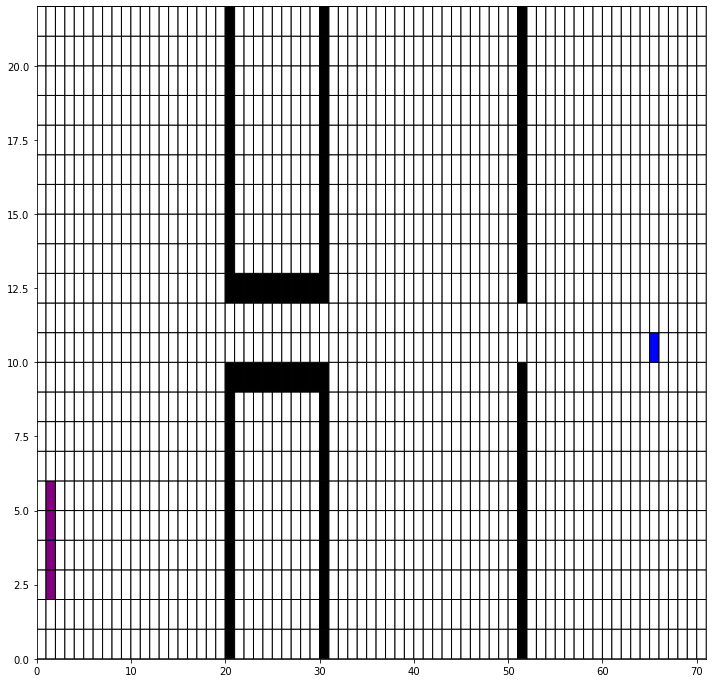

In [4]:
from Automata import Automata
from utils import visualize
import math

%load_ext autoreload
%autoreload 2


import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

# pedestrians = []
# id = 0
# for i in range (1, 10):
#     for j in range(2, 19):
#         pedestrians.append([id, i, j])
#         id = id + 1
#         if id == 150:
#             break
pedestrians = []
id = 1
for i in range (1, 10):
    for j in range(2, 19):
        pedestrians.append([id, i, j])
        id = id + 1
        if id == 5:
            break
    if id == 5:
        break
            
configTask41 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 71,
        "height": 22
    },
    "pedestrians": pedestrians,
    "targets": [
        [[i for i in range(1, 6)], 65, 10],
    ],
    "obstacles": [[20, i] for i in range(0, 22) if not i == 10 and not i == 11] + \
    [[i, 9] for i in range(21, 30)] + \
    [[i, 12] for i in range(21, 30)] + \
    [[30, i] for i in range(0, 22) if not i == 10 and not i == 11] + \
    [[51, i] for i in range(0, 22) if not i == 10 and not i == 11]
    
}
#print(configTask41)
task41Automata = Automata(configTask41)
visualize(task41Automata.getState())

In [5]:
#task41Automata.simulate(task41Automata.operatorWithCostFunction, 10, avoidObstacles = False)
np.around(task41Automata.dijkstra((65, 10), avoidObstacles = True, avoidPedestrians = True), decimals=2)

array([[69.14, 68.14, 67.14, 66.14, 65.14, 64.14, 63.14, 62.14, 61.14,
        60.14, 59.14, 58.73, 58.31, 57.9 , 57.49, 57.07, 56.66, 56.24,
        55.83, 55.41,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
          inf,   inf,   inf,   inf, 38.14, 37.14, 36.14, 35.14, 34.14,
        33.14, 32.14, 31.14, 30.14, 29.14, 28.14, 27.73, 27.31, 26.9 ,
        26.49, 26.07, 25.66, 25.24, 24.83, 24.41,   inf, 17.14, 16.14,
        15.14, 14.14, 13.73, 13.31, 12.9 , 12.49, 12.07, 11.66, 11.24,
        10.83, 10.41, 10.  , 10.41, 10.83, 11.24, 11.66, 12.07],
       [68.73, 67.73, 66.73, 65.73, 64.73, 63.73, 62.73, 61.73, 60.73,
        59.73, 58.73, 57.73, 57.31, 56.9 , 56.49, 56.07, 55.66, 55.24,
        54.83, 54.41,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
          inf,   inf,   inf,   inf, 37.73, 36.73, 35.73, 34.73, 33.73,
        32.73, 31.73, 30.73, 29.73, 28.73, 27.73, 26.73, 26.31, 25.9 ,
        25.49, 25.07, 24.66, 24.24, 23.83, 23.41,   inf, 16.73, 15.73,
        14.7

In [6]:
task41Automata = Automata(configTask41)
task41Automata.simulate(task41Automata.operatorWithCostFunction, 60, avoidObstacles = True, avoidPedestrians = True)

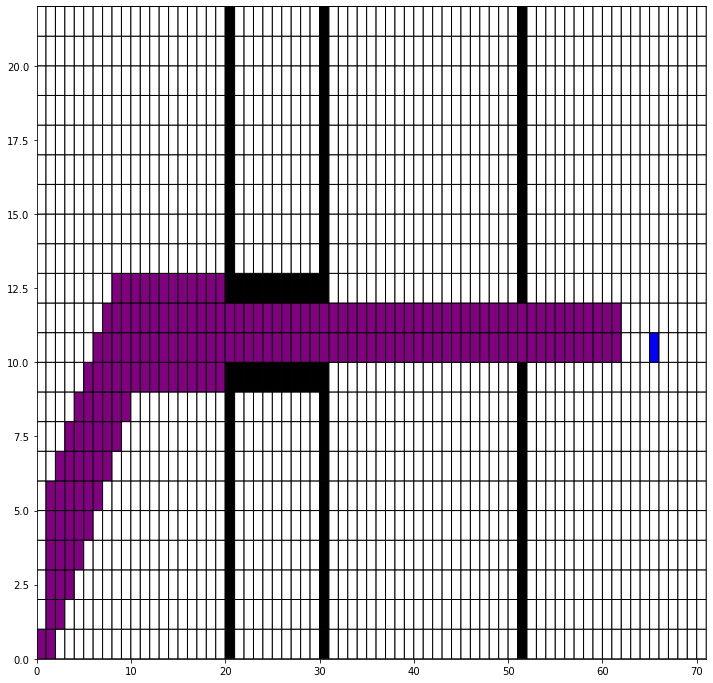

In [10]:


visualize(task41Automata.getStateWithPaths())
#task41Automata.getPaths()

### Scenario 4.2 - What happens for the "chicken test" scenario, figure 5?

Without obstacle avoidance and for 20 steps:

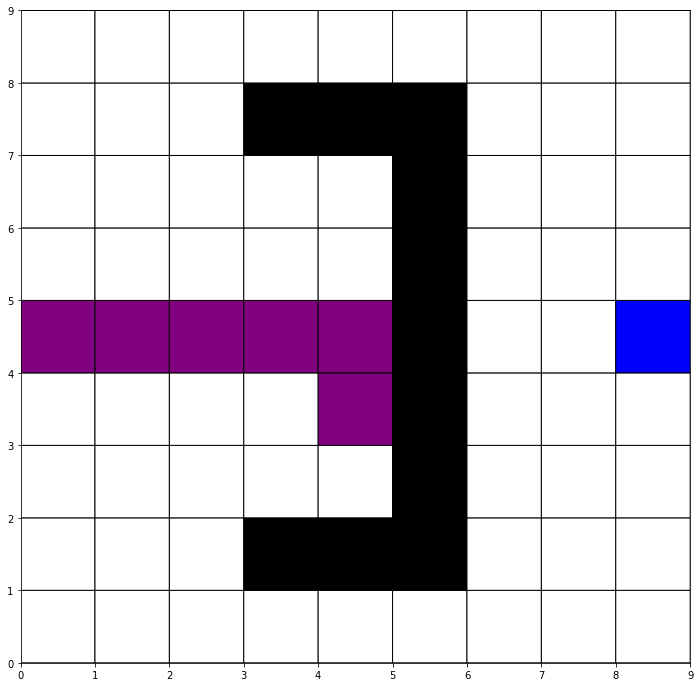

In [44]:
configTask42 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 9,
        "height": 9
    },
    "pedestrians": [
        [1, 0, 4]
    ],
    "targets": [
        [[1, 2], 8, 4]
    ],
    "obstacles": [
        [3, 1], [4, 1], [5, 1], [5, 3], [5, 4], [5, 5], [5, 7], [4, 7], [3, 7], [5, 2], [5, 6]
    ]
}
task42Automata = Automata(configTask42)
task42Automata.simulate(task42Automata.operatorWithCostFunction, 20, avoidObstacles = False)
visualize(task42Automata.getStateWithPaths())

With obstacle avoidance and for 20 steps:

Simulation finished after 10 steps. All pedestrians achieved their targets.


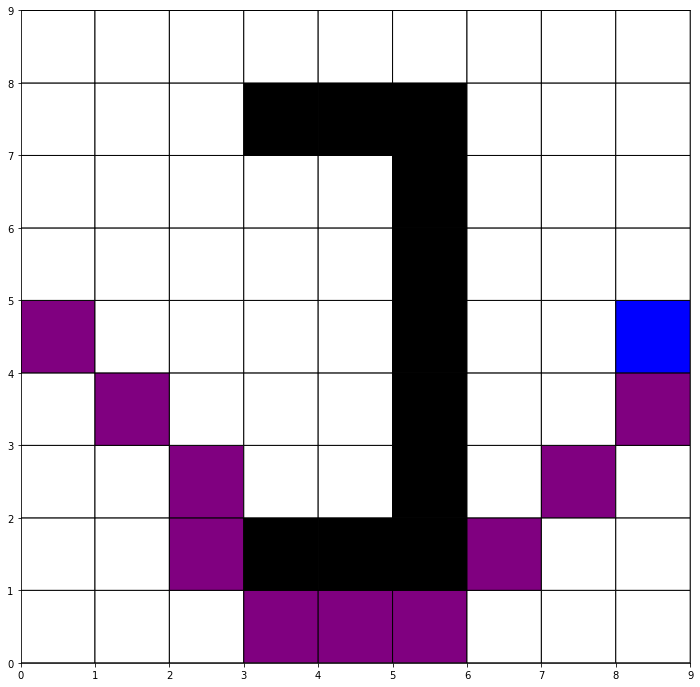

In [45]:
task42Automata = Automata(configTask42)
task42Automata.simulate(task42Automata.operatorWithCostFunction, 20, avoidObstacles = True)
visualize(task42Automata.getStateWithPaths())

## Task 5 - Tests

### TEST1: RiMEA scenario 1 (straight line, ignore premovement time)

Scenario:
- 1 cell = 0.4m x 0.4m

In [1]:
from Automata import Automata
from utils import visualize
import math

%load_ext autoreload
%autoreload 2

rimea1 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 80,
        "height": 4 # 1 cell = 0.4 meter ===> 2 m wide = (0.4m/cell)/2m = 
    },
    "pedestrians": [
        [1, 0, 1, 1.33]
    ],
    "targets": [
        [[1], 79, 1]
    ],
    "obstacles": [
        
    ],
    
    "step": 0.5
}
rimea1Automata = Automata(rimea1)

#rimea1Automata.simulate2(rimea1Automata.operatorWithCostFunction_Angelos, 5)
#rimea1Automata.availableSteps
#visualize(rimea1Automata.getState(), size = (15,5))
#rimea1Automata.simulateAndVisualize(rimea1Automata.operatorWithCostFunction, 1000, size = (15, 5))

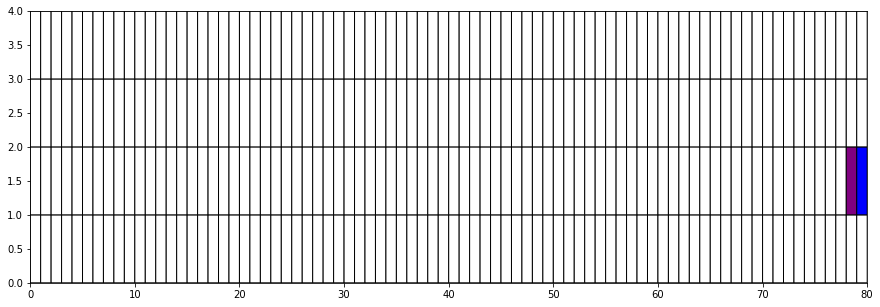

Simulation finished after 30 seconds. All pedestrians achieved their targets.


In [2]:

#rimea1Automata.simulate2(rimea1Automata.operatorWithCostFunction_Angelos, 30)
#visualize(rimea1Automata.getState(), size = (15,5))
rimea1Automata.simulateAndVisualize2(rimea1Automata.operatorWithCostFunction_Angelos, 30, size = (15, 5))

### TEST2: RiMEA scenario 4 (fundamental diagram, be careful with periodic boundary conditions)

Scenario:
- ...

### TEST3: RiMEA scenario 6 (movement around a corner).

Scenario:
- ...

In [30]:
# from Automata import Automata
# from utils import visualize
# import math

# %load_ext autoreload
# %autoreload 2

# ob = []
# for i in range(0, 20):
#     ob.append([i, 4])
    
# for i in range(4, 24):
#     ob.append([19, i])

# ped = []
# id = 1
# for i in range(0, 10, 2):
#     ped.append([id, i, 0, 1.33])
#     id += 1
    
# for i in range(0, 10, 2):
#     ped.append([id, i, 2, 1.33])
#     id += 1
    
    
# for i in range(1, 10, 2):
#     ped.append([id, i, 1, 1.33])
#     id += 1
    
# for i in range(1, 11, 2):
#     ped.append([id, i, 3, 1.33])
#     id += 1
#     if (id == 21):
#         break
    
# print(len(ped))
    

    
# rimea1 = {
#     "name": "Task1Scenario",
#     "dimensions": {
#         "width": 24,
#         "height": 24 # 1 cell = 0.4 meter ===> 2 m wide = (0.4m/cell)/2m = 
#     },
#     "pedestrians": ped,
#     "targets": [
#         [[1], 21, 23]
#     ],
#     "obstacles": ob,
    
#     "step": 0.5
# }
# rimea1Automata = Automata(rimea1)

# #visualize(rimea1Automata.getState(), size = (15,15))
# rimea1Automata.simulateAndVisualize2(rimea1Automata.operatorWithCostFunction_Angelos, 30, size = (15, 15))

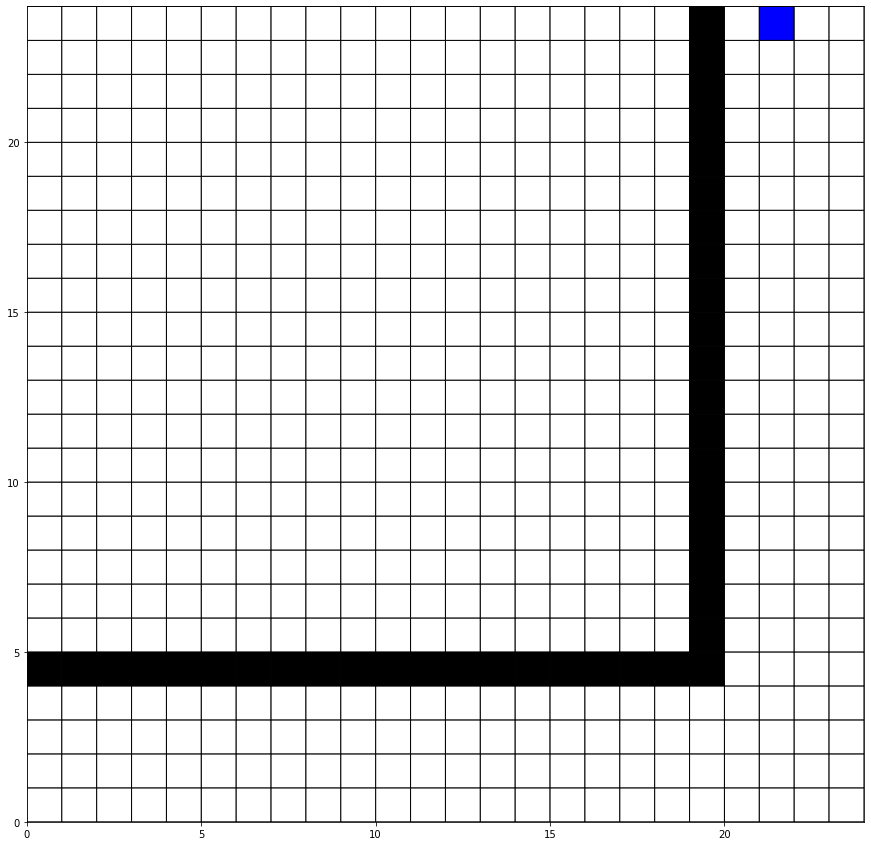

Simulation finished after 81 seconds. All pedestrians achieved their targets.


In [29]:
from Automata import Automata
from utils import visualize
import math

%load_ext autoreload
%autoreload 2

ob = []
for i in range(0, 20):
    ob.append([i, 4])
    
for i in range(4, 24):
    ob.append([19, i])    
    
ped = []
id = 1
for i in range(0, 10, 2):
    ped.append([id, i, 0, 0.5])
    id += 1
    
for i in range(0, 10, 2):
    ped.append([id, i, 2, 0.5])
    id += 1
    
    
for i in range(1, 10, 2):
    ped.append([id, i, 1, 0.5])
    id += 1
    
for i in range(1, 11, 2):
    ped.append([id, i, 3, 0.5])
    id += 1
    if (id == 21):
        break
    

    
rimea1 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 24,
        "height": 24 # 1 cell = 0.4 meter ===> 2 m wide = (0.4m/cell)/2m = 
    },
    "pedestrians": ped,
    "targets": [
        [[i for i in range(1, 21)], 21, 23]
    ],
    "obstacles": ob,
    
    "step": 0.5
}
rimea1Automata = Automata(rimea1)

#visualize(rimea1Automata.getState(), size = (15,15))
rimea1Automata.simulateAndVisualize2(rimea1Automata.operatorWithCostFunction_Angelos, 80, size = (15, 15))

### TEST4: RiMEA scenario 7 (demographic parameters, visual comparison of  gure and results is suffcient. Simple and correct statistical test gives 5 bonus points if you argue why your choice of test is correct).

Scenario:
- ...

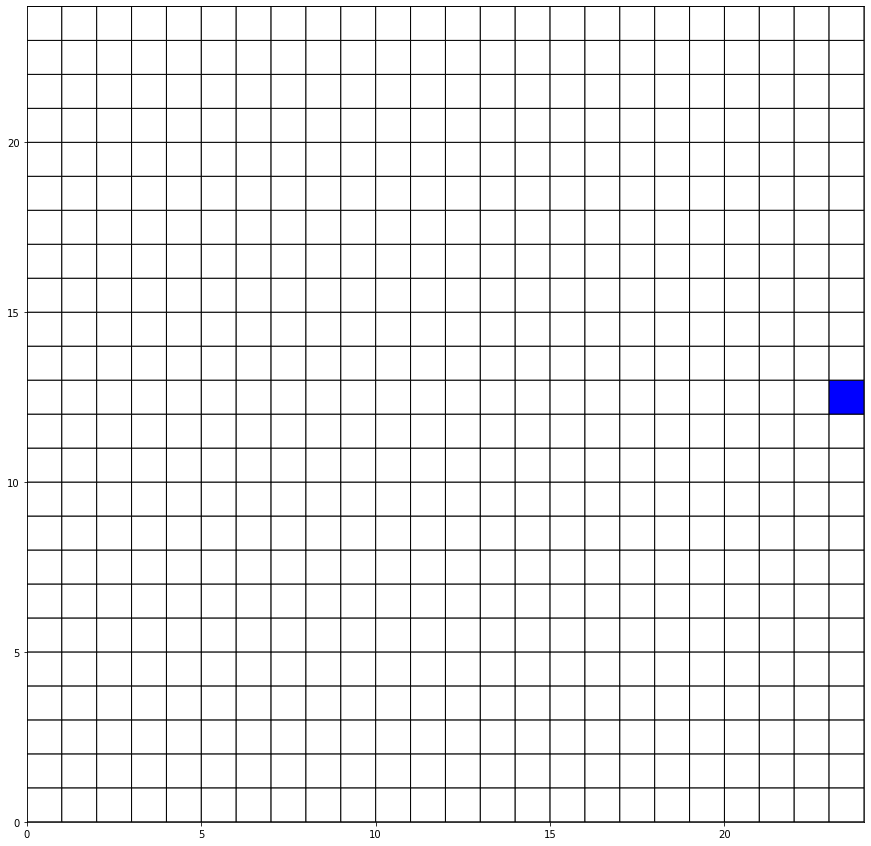

Simulation finished after 81 seconds. All pedestrians achieved their targets.


In [65]:
from Automata import Automata
from utils import visualize
import math
import random

%load_ext autoreload
%autoreload 2  
    
ped = []
id = 1

# 20s
for i in range(0, 24, 3):
    ped.append([id, i, 0, random.uniform(1.6, 1.64)])
    id += 1

# 30s
for i in range(0, 23, 3):
    ped.append([id, i, 4, random.uniform(1.52, 1.56)])
    id += 1
    
# 40s    
for i in range(1, 20, 3):
    ped.append([id, i, 8, random.uniform(1.46, 1.5)])
    id += 1
# 50s    
for i in range(1, 20, 3):
    ped.append([id, i, 12, random.uniform(1.39, 1.43)])
    id += 1
# 60s    
for i in range(1, 20, 3):
    ped.append([id, i, 16, random.uniform(1.27, 1.27)])
    id += 1
# 20s    
for i in range(1, 20, 3):
    ped.append([id, i, 20, random.uniform(1.6, 1.64)])
    id += 1
# 70s    
for i in range(1, 20, 3):
    ped.append([id, i, 23, random.uniform(1.07, 1.07)])
    id += 1
    if (id == 51):
        break
        
        
# 20s: 1 - 8 & 38 - 44
# 30s: 9 - 16
# 40s: 17 - 23
# 50s: 24 - 30
# 60s: 31 - 37
# 70s: 45 - 50

rimea1 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 24,
        "height": 24 # 1 cell = 0.4 meter ===> 2 m wide = (0.4m/cell)/2m = 
    },
    "pedestrians": ped,
    "targets": [
        [[i for i in range(1, 51)], 23, 12]
    ],
    "obstacles": [],
    
    "step": 0.5
}
rimea1Automata = Automata(rimea1)

#visualize(rimea1Automata.getState(), size = (15,15))

#print(ped)

rimea1Automata.simulateAndVisualize2(rimea1Automata.operatorWithCostFunction_Angelos, 80, size = (15, 15))

In [66]:
# Performing 
rimea1Automata.times

{1: 8,
 2: 6,
 3: 6,
 4: 5,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 8,
 10: 7,
 11: 6,
 12: 5,
 13: 3,
 14: 2,
 15: 2,
 16: 3,
 17: 9,
 18: 7,
 19: 8,
 20: 5,
 21: 6,
 22: 2,
 23: 1,
 24: 9,
 25: 8,
 26: 7,
 27: 5,
 28: 4,
 29: 2,
 30: 1,
 31: 9,
 32: 10,
 33: 7,
 34: 6,
 35: 7,
 36: 3,
 37: 1,
 38: 9,
 39: 7,
 40: 7,
 41: 4,
 42: 3,
 43: 2,
 44: 3,
 45: 11,
 46: 10,
 47: 9,
 48: 11,
 49: 8,
 50: 6}

In [67]:
rimea1Automata.paths

{1: [(0, 0),
  (1, 1),
  (2, 2),
  (3, 3),
  (4, 4),
  (5, 5),
  (6, 6),
  (7, 7),
  (8, 8),
  (9, 7),
  (10, 8),
  (11, 9),
  (12, 8),
  (13, 7),
  (14, 8),
  (15, 9),
  (16, 10),
  (17, 11),
  (18, 10),
  (19, 10),
  (20, 10),
  (20, 11),
  (21, 11),
  (22, 12)],
 2: [(3, 0),
  (4, 1),
  (5, 2),
  (6, 3),
  (7, 4),
  (8, 5),
  (9, 6),
  (10, 7),
  (11, 8),
  (12, 7),
  (13, 8),
  (14, 9),
  (15, 10),
  (16, 9),
  (17, 10),
  (18, 9),
  (19, 10),
  (20, 11),
  (21, 11),
  (22, 12)],
 3: [(6, 0),
  (7, 1),
  (8, 2),
  (9, 3),
  (10, 4),
  (11, 5),
  (12, 6),
  (13, 7),
  (14, 8),
  (15, 7),
  (16, 8),
  (17, 9),
  (18, 9),
  (19, 8),
  (20, 8),
  (19, 9),
  (20, 10),
  (21, 10),
  (22, 11)],
 4: [(9, 0),
  (10, 1),
  (11, 2),
  (12, 3),
  (13, 4),
  (14, 5),
  (15, 6),
  (16, 7),
  (17, 8),
  (18, 9),
  (19, 10),
  (19, 11),
  (20, 10),
  (21, 10),
  (22, 9),
  (22, 10),
  (23, 11)],
 5: [(12, 0),
  (13, 1),
  (14, 2),
  (15, 3),
  (16, 4),
  (17, 5),
  (18, 6),
  (19, 7),
  (20, 8),
 

In [75]:
thirties = [9, 10, 11, 12, 13, 14, 15, 16]
avg = 0.0

for pedestrian in rimea1Automata.pedestrians:
    if (pedestrian[0] in thirties):
        avg += ( 0.5 * len(rimea1Automata.paths[pedestrian[0]]) / ( rimea1Automata.times[pedestrian[0]] ))
        
mean = avg / len(thirties)

In [79]:
seventies = [45, 46, 47, 48, 49, 50]
avg = 0.0

for pedestrian in rimea1Automata.pedestrians:
    if (pedestrian[0] in seventies):
        avg += ( 0.5 * len(rimea1Automata.paths[pedestrian[0]]) / ( rimea1Automata.times[pedestrian[0]] ))
        
mean = avg / len(seventies)

In [80]:
mean

1.0083333333333333